In [27]:
from autogluon.tabular import TabularDataset, TabularPredictor
import pandas as pd
import sys,os
sys.path.append(os.path.realpath('..'))

from core.multilabel import MultilabelPredictor

In [29]:
#concat data and form dataset
class_train_data = TabularDataset('E:/jupyter_workspace/Oxidation_open_access/data/test/Oxidation_train_1896_class.csv')
class_test_data = TabularDataset('E:/jupyter_workspace/Oxidation_open_access/data/test/Oxidation_test_240_class.csv')
regress_train_data = TabularDataset('E:/jupyter_workspace/Oxidation_open_access/data/test/Oxidation_train_1896_regress.csv')
regress_test_data = TabularDataset('E:/jupyter_workspace/Oxidation_open_access/data/test/Oxidation_test_240_regress.csv')

labels = ['Y/N','Yield']  # which columns to predict based on the others
train_data = class_train_data.copy()
train_data['Yield'] = regress_train_data['Yield']
test_data = class_test_data.copy()
test_data['Yield'] = regress_test_data['Yield']

Loaded data from: E:/jupyter_workspace/Oxidation_open_access/data/Oxidation_train_1896_class.csv | Columns = 106 / 106 | Rows = 1896 -> 1896
Loaded data from: E:/jupyter_workspace/Oxidation_open_access/data/Oxidation_test_240_class.csv | Columns = 106 / 106 | Rows = 240 -> 240
Loaded data from: E:/jupyter_workspace/Oxidation_open_access/data/Oxidation_train_1896_regress.csv | Columns = 106 / 106 | Rows = 1896 -> 1896
Loaded data from: E:/jupyter_workspace/Oxidation_open_access/data/Oxidation_test_240_regress.csv | Columns = 106 / 106 | Rows = 240 -> 240


In [30]:
#train model

problem_types = ['binary','regression']  # type of each prediction problem (optional)
eval_metrics = ['accuracy','mean_absolute_error']  # metrics used to evaluate predictions for each label (optional)
save_path = '../AutogluonModels/multilabel'  # specifies folder to store trained models (optional)

#time_limit = 5  # how many seconds to train the TabularPredictor for each label, set much larger in your applications!

multi_predictor = MultilabelPredictor(labels=labels, problem_types=problem_types, eval_metrics=eval_metrics, path=save_path)
#multi_predictor.fit(train_data, time_limit=time_limit)
multi_predictor.fit(train_data)

Beginning AutoGluon training ...
AutoGluon will save models to "../AutogluonModels/multilabel\Predictor_Y/N\"
AutoGluon Version:  0.4.0
Python Version:     3.9.12
Operating System:   Windows
Train Data Rows:    1896
Train Data Columns: 105
Label Column: Y/N
Preprocessing data ...
Selected class <--> label mapping:  class 1 = Y, class 0 = N
	Note: For your binary classification, AutoGluon arbitrarily selected which label-value represents positive (Y) vs negative (N) class.
	To explicitly set the positive_class, either rename classes to 1 and 0, or specify positive_class in Predictor init.
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    7556.44 MB
	Train Data (Original)  Memory Usage: 1.59 MB (0.0% of available memory)
	Inferring data type of each feature based on column values. Set feature_metadata_in to manually specify special dtypes of the features.
	Stage 1 Generators:
		Fitting AsTypeFeatureGenerato

Fitting TabularPredictor for label: Y/N ...


	0.01s	 = Training   runtime
	0.02s	 = Validation runtime
Fitting model: KNeighborsDist ...
	0.9368	 = Validation score   (accuracy)
	0.01s	 = Training   runtime
	0.02s	 = Validation runtime
Fitting model: LightGBMXT ...
	0.95	 = Validation score   (accuracy)
	0.78s	 = Training   runtime
	0.0s	 = Validation runtime
Fitting model: LightGBM ...
	0.9526	 = Validation score   (accuracy)
	0.55s	 = Training   runtime
	0.0s	 = Validation runtime
Fitting model: RandomForestGini ...
	0.9553	 = Validation score   (accuracy)
	0.41s	 = Training   runtime
	0.05s	 = Validation runtime
Fitting model: RandomForestEntr ...
	0.9526	 = Validation score   (accuracy)
	0.43s	 = Training   runtime
	0.05s	 = Validation runtime
Fitting model: CatBoost ...
	0.9605	 = Validation score   (accuracy)
	3.34s	 = Training   runtime
	0.02s	 = Validation runtime
Fitting model: ExtraTreesGini ...
	0.9447	 = Validation score   (accuracy)
	0.42s	 = Training   runtime
	0.06s	 = Validation runtime
Fitting model: ExtraTreesEn

Fitting TabularPredictor for label: Yield ...


	0.02s	 = Training   runtime
	0.02s	 = Validation runtime
Fitting model: KNeighborsDist ...
	-0.0785	 = Validation score   (mean_absolute_error)
	0.01s	 = Training   runtime
	0.02s	 = Validation runtime
Fitting model: LightGBMXT ...
	-0.0532	 = Validation score   (mean_absolute_error)
	0.58s	 = Training   runtime
	0.0s	 = Validation runtime
Fitting model: LightGBM ...
	-0.0504	 = Validation score   (mean_absolute_error)
	0.63s	 = Training   runtime
	0.0s	 = Validation runtime
Fitting model: RandomForestMSE ...
	-0.0506	 = Validation score   (mean_absolute_error)
	0.91s	 = Training   runtime
	0.04s	 = Validation runtime
Fitting model: CatBoost ...
	-0.0592	 = Validation score   (mean_absolute_error)
	7.54s	 = Training   runtime
	0.0s	 = Validation runtime
Fitting model: ExtraTreesMSE ...
	-0.0515	 = Validation score   (mean_absolute_error)
	0.56s	 = Training   runtime
	0.03s	 = Validation runtime
Fitting model: NeuralNetFastAI ...
	-0.0597	 = Validation score   (mean_absolute_error)
	1.

MultilabelPredictor saved to disk. Load with: MultilabelPredictor.load('../AutogluonModels/multilabel\')


In [31]:
#test model
save_path = '../AutogluonModels/multilabel'    #load_model_path

test_data_nolab = test_data.drop(columns=labels)  # unnecessary, just to demonstrate we're not cheating here
multi_predictor = MultilabelPredictor.load(save_path)  # unnecessary, just demonstrates how to load previously-trained multilabel predictor from file

predictions = multi_predictor.predict(test_data_nolab)

y_test_regress = test_data['Yield']
y_pred_regress = multi_predictor.predict(test_data_nolab)

pd.set_option('display.width',None)
pd.set_option('display.max_rows',None)
pd.set_option('display.max_colwidth',None)

print("Predictions:  \n", predictions)
evaluations = multi_predictor.evaluate(test_data)
print(evaluations)
print("Evaluated using metrics:", multi_predictor.eval_metrics)

predictor_regress = multi_predictor.get_predictor('Yield')
leaderborad_train = predictor_regress.leaderboard(test_data,silent=True,extra_metrics=['rmse','mae','r2'])
print(leaderborad_train)
leaderborad_test = predictor_regress.leaderboard(test_data, extra_metrics=['rmse','mae','r2'],silent=True)
print(leaderborad_test)

Predicting with TabularPredictor for label: Y/N ...
Predicting with TabularPredictor for label: Yield ...
Predicting with TabularPredictor for label: Y/N ...
Predicting with TabularPredictor for label: Yield ...


Evaluation: accuracy on test data: 0.7541666666666667
Evaluations on test data:
{
    "accuracy": 0.7541666666666667,
    "balanced_accuracy": 0.646579242515745,
    "mcc": 0.3341051275157196,
    "roc_auc": 0.7462255197998446,
    "f1": 0.47787610619469034,
    "precision": 0.5869565217391305,
    "recall": 0.40298507462686567
}


Predictions:  
     Y/N     Yield
0     Y  0.418313
1     Y  0.403106
2     Y  0.490134
3     Y  0.433203
4     Y  0.433203
5     Y  0.435451
6     Y  0.426479
7     Y  0.372255
8     Y  0.433739
9     Y  0.193207
10    Y  0.251511
11    Y  0.672633
12    N  0.007313
13    N  0.008218
14    N  0.009745
15    N  0.007672
16    N  0.007672
17    N  0.008130
18    N  0.010329
19    N  0.010153
20    N  0.010554
21    N  0.006706
22    N  0.012322
23    N  0.013638
24    N  0.002531
25    N  0.003192
26    N  0.003671
27    N  0.003985
28    N  0.003985
29    N  0.003735
30    N  0.005720
31    N  0.006054
32    N  0.003699
33    N  0.002066
34    N  0.000920
35    N  0.003384
36    N  0.003227
37    N  0.001636
38    N  0.012833
39    N  0.007094
40    N  0.007094
41    N  0.001167
42    N  0.004769
43    N  0.006281
44    N  0.006614
45    N  0.005864
46    N  0.003104
47    N  0.006338
48    Y  0.198983
49    Y  0.176960
50    Y  0.206772
51    Y  0.157093
52    Y  0.157093
53    N  0.0

Evaluation: mean_absolute_error on test data: -0.03386628575494715
	Note: Scores are always higher_is_better. This metric score can be multiplied by -1 to get the metric value.
Evaluations on test data:
{
    "mean_absolute_error": -0.03386628575494715,
    "root_mean_squared_error": -0.07414342346541652,
    "mean_squared_error": -0.005497247243172077,
    "r2": 0.8033542234394536,
    "pearsonr": 0.9015713156373438,
    "median_absolute_error": -0.004571843699154496
}


{'Y/N': {'accuracy': 0.7541666666666667, 'balanced_accuracy': 0.646579242515745, 'mcc': 0.3341051275157196, 'roc_auc': 0.7462255197998446, 'f1': 0.47787610619469034, 'precision': 0.5869565217391305, 'recall': 0.40298507462686567}, 'Yield': {'mean_absolute_error': -0.03386628575494715, 'root_mean_squared_error': -0.07414342346541652, 'mean_squared_error': -0.005497247243172077, 'r2': 0.8033542234394536, 'pearsonr': 0.9015713156373438, 'median_absolute_error': -0.004571843699154496}}
Evaluated using metrics: {'Y/N': 'accuracy', 'Yield': 'mean_absolute_error'}
                  model  score_test  root_mean_squared_error  \
0        NeuralNetTorch   -0.017805                -0.047243   
1   WeightedEnsemble_L2   -0.040276                -0.078101   
2               XGBoost   -0.040286                -0.078241   
3              LightGBM   -0.040901                -0.077532   
4         LightGBMLarge   -0.044462                -0.086274   
5       RandomForestMSE   -0.044757                -

In [16]:
feature = predictor_regress.feature_importance(test_data)
print(feature)

Computing feature importance via permutation shuffling for 106 features using 1000 rows with 3 shuffle sets...
	87.4s	= Expected runtime (29.13s per shuffle set)
	17.63s	= Actual runtime (Completed 3 of 3 shuffle sets)


                  importance    stddev   p_value  n  p99_high   p99_low
Y/N                 0.066253  0.002712  0.000279  3  0.081792  0.050714
Lengh_3             0.003699  0.000140  0.000239  3  0.004501  0.002897
5                   0.002668  0.000512  0.006036  3  0.005605 -0.000268
E_LOMO              0.002090  0.000679  0.016686  3  0.005978 -0.001798
Ele_ind             0.001976  0.000524  0.011336  3  0.004981 -0.001028
Cav_sur             0.001896  0.000495  0.010990  3  0.004734 -0.000941
61                  0.001427  0.000299  0.007170  3  0.003140 -0.000287
39                  0.001254  0.000261  0.007067  3  0.002749 -0.000242
3_Nuc               0.001039  0.000255  0.009704  3  0.002498 -0.000419
10                  0.000950  0.000152  0.004195  3  0.001819  0.000081
3mulliken_charge    0.000900  0.000308  0.018468  3  0.002665 -0.000866
48                  0.000891  0.000165  0.005646  3  0.001838 -0.000057
3APT_charge         0.000878  0.000553  0.055423  3  0.004049 -0

In [32]:
save_path1 = '../AutogluonModels/multilabel/Predictor_Yield'
predictor = TabularPredictor.load(save_path1)
y_pred = predictor.predict(test_data, model = 'NeuralNetTorch')
data1={'y_true':test_data['Yield'],'y_preds_Yield':y_pred}
pred =  pd.DataFrame(data1)
print(pred)

       y_true  y_preds_Yield
0    0.610088   5.245358e-01
1    0.616304   5.389887e-01
2    0.617218   6.602712e-01
3    0.578293   5.134273e-01
4    0.562500   5.134273e-01
5    0.401087   4.589361e-01
6    0.510304   4.002286e-01
7    0.490095   3.154286e-01
8    0.538043   3.383662e-01
9    0.384388   1.978149e-01
10   0.435326   3.680965e-01
11   0.600525   6.152451e-01
12   0.000000   6.991193e-08
13   0.000000   4.660782e-07
14   0.000000   1.203729e-06
15   0.000000   1.766369e-06
16   0.000000   1.766369e-06
17   0.000000   1.604629e-06
18   0.000000   5.033274e-06
19   0.000000   4.920075e-06
20   0.000000   9.376958e-06
21   0.000000   7.189801e-07
22   0.000000   1.090988e-05
23   0.000000   1.346510e-05
24   0.000000   1.470669e-05
25   0.000000   4.278708e-05
26   0.000000   5.729479e-05
27   0.000000   5.661122e-05
28   0.000000   5.661122e-05
29   0.000000   2.617997e-05
30   0.000000   2.925039e-04
31   0.000000   1.655839e-04
32   0.000000   1.973647e-04
33   0.000000 

C:\Users\Administrator.DESKTOP-08R43GA\AppData\Local\Temp\ipykernel_30448\1407793088.py:37: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


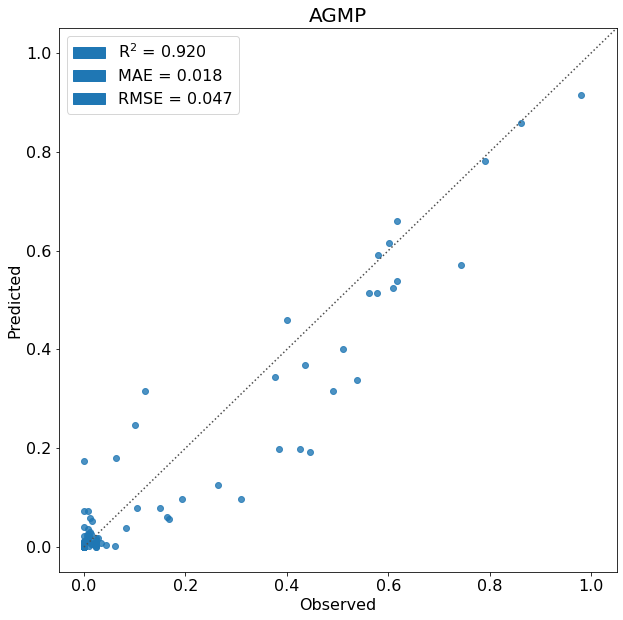

In [33]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np


def make_plot(y_test, y_pred, rsme, r2_score, mae, name):
    fontsize = 16
    fig, ax = plt.subplots(figsize=(10, 10))
    r2_patch = mpatches.Patch(label="R$^2$ = {:.3f}".format(r2_score), color="#1f77b4")
    mae_patch = mpatches.Patch(label="MAE = {:.3f}".format(mae), color="#1f77b4")
    rmse_patch = mpatches.Patch(label="RMSE = {:.3f}".format(rmse), color="#1f77b4")
    plt.xlim(-0.05, 1.05)
    plt.ylim(-0.05, 1.05)
    plt.scatter(y_test, y_pred, alpha=0.8, color="#1f77b4")
    plt.plot(np.arange(100), np.arange(100), ls=':', c=".3")
    plt.legend(handles=[r2_patch,mae_patch,rmse_patch],fontsize=fontsize)
    plt.tick_params(axis='both',which='major',labelsize =16)
    ax.set_ylabel('Predicted', fontsize=fontsize)
    ax.set_xlabel('Observed', fontsize=fontsize)
    ax.set_title(name, fontsize=20)
    return fig

y_true = pred['y_true']
y_preds = pred['y_preds_Yield']
y_preds = np.clip(y_preds, 0, 100)
name = 'AGMP'

r_squared = r2_score(y_true, y_preds)
mae = mean_absolute_error(y_true, y_preds)
rmse = mean_squared_error(y_true, y_preds) ** 0.5


fig = make_plot(y_true, y_preds, rmse, r_squared, mae, name)

fig.show()
fig.savefig('AGMP_R2_figure_0705.png')
